In [43]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df  = pd.read_csv("adult_dataset.csv", na_values="?", skipinitialspace=True)

In [23]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

## Drop rows consisting of missing values

In [24]:
# Total missing values
df.isna().sum()
df = df.dropna() 
df.head(100)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,50,Private,102346,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,2415,20,United-States,>50K
109,47,Private,148995,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2415,60,United-States,>50K
110,47,Self-emp-inc,102308,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,45,United-States,>50K
111,67,Private,105252,Bachelors,13,Widowed,Exec-managerial,Not-in-family,White,Male,0,2392,40,United-States,>50K


## Perform any preprocessing steps on the data

In [25]:

X=df[['age', 'workclass', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']]
# as education and education.num are the same column therefore we are going to use education.num only
X[0:10]

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
7,74,State-gov,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States
8,68,Federal-gov,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States
10,45,Private,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States
11,38,Self-emp-not-inc,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States
12,52,Private,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States


In [26]:
y = df['income']
y[0:10]

1     <=50K
3     <=50K
4     <=50K
5     <=50K
6     <=50K
7      >50K
8     <=50K
10     >50K
11     >50K
12     >50K
Name: income, dtype: object

In [27]:
def encode_lab(X , cols):
    for c in cols:
        le.fit(X[c])
        X[c] = le.transform(X[c])
    return X 

In [28]:
from sklearn import  preprocessing 
le=preprocessing.LabelEncoder()
cols = ['workclass','marital.status', 'occupation', 'relationship','race', 'sex','native.country']
X = encode_lab(X , cols)




<ipython-input-27-bee9c7246cdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = le.transform(X[c])


In [29]:
X.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,2,9,6,3,1,4,0,0,4356,18,38
3,54,2,4,0,6,4,4,0,0,3900,40,38
4,41,2,10,5,9,3,4,0,0,3900,40,38
5,34,2,9,0,7,4,4,0,0,3770,45,38
6,38,2,6,5,0,4,4,1,0,3770,40,38


In [30]:
def scaling(X, cols):
    scaler = StandardScaler()
    scaler.fit(X[cols])
    X[cols] = scaler.transform(X[cols])
    return X

In [31]:
numeric_cols = ['capital.loss', 'capital.gain', 'hours.per.week', 'age']
X = scaling(X, numeric_cols)

<ipython-input-30-37aa56458031>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = scaler.transform(X[cols])
/Users/arslan/anaconda3/envs/data_work/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [33]:
X.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,3.316630,2,9,6,3,1,4,0,-0.147445,10.555814,-1.914161,38
3,1.184831,2,4,0,6,4,4,0,-0.147445,9.427915,-0.077734,38
4,0.195067,2,10,5,9,3,4,0,-0.147445,9.427915,-0.077734,38
5,-0.337883,2,9,0,7,4,4,0,-0.147445,9.106365,0.339636,38
6,-0.033340,2,6,5,0,4,4,1,-0.147445,9.106365,-0.077734,38


## Split the data into train and test sets

In [34]:
from sklearn.model_selection import train_test_split
# apply train test split on X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

## Train a decision tree and evaluate its results

In [35]:
# model training
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

##  Report accuracy and confusion matrix on your predictions

In [36]:
# predict test data
y_pred = clf.predict(X_test)

In [39]:
print("test accuracy:", accuracy_score(y_test, y_pred))

test accuracy: 0.845682081882977


In [41]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4314,  224],
       [ 707,  788]])

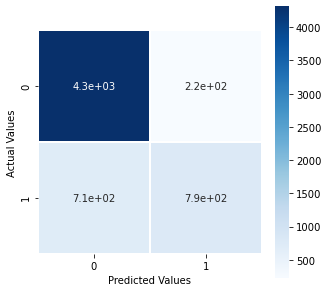

In [44]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Plot a visual representation of the decision tree you developed

In [45]:
from sklearn.tree import plot_tree

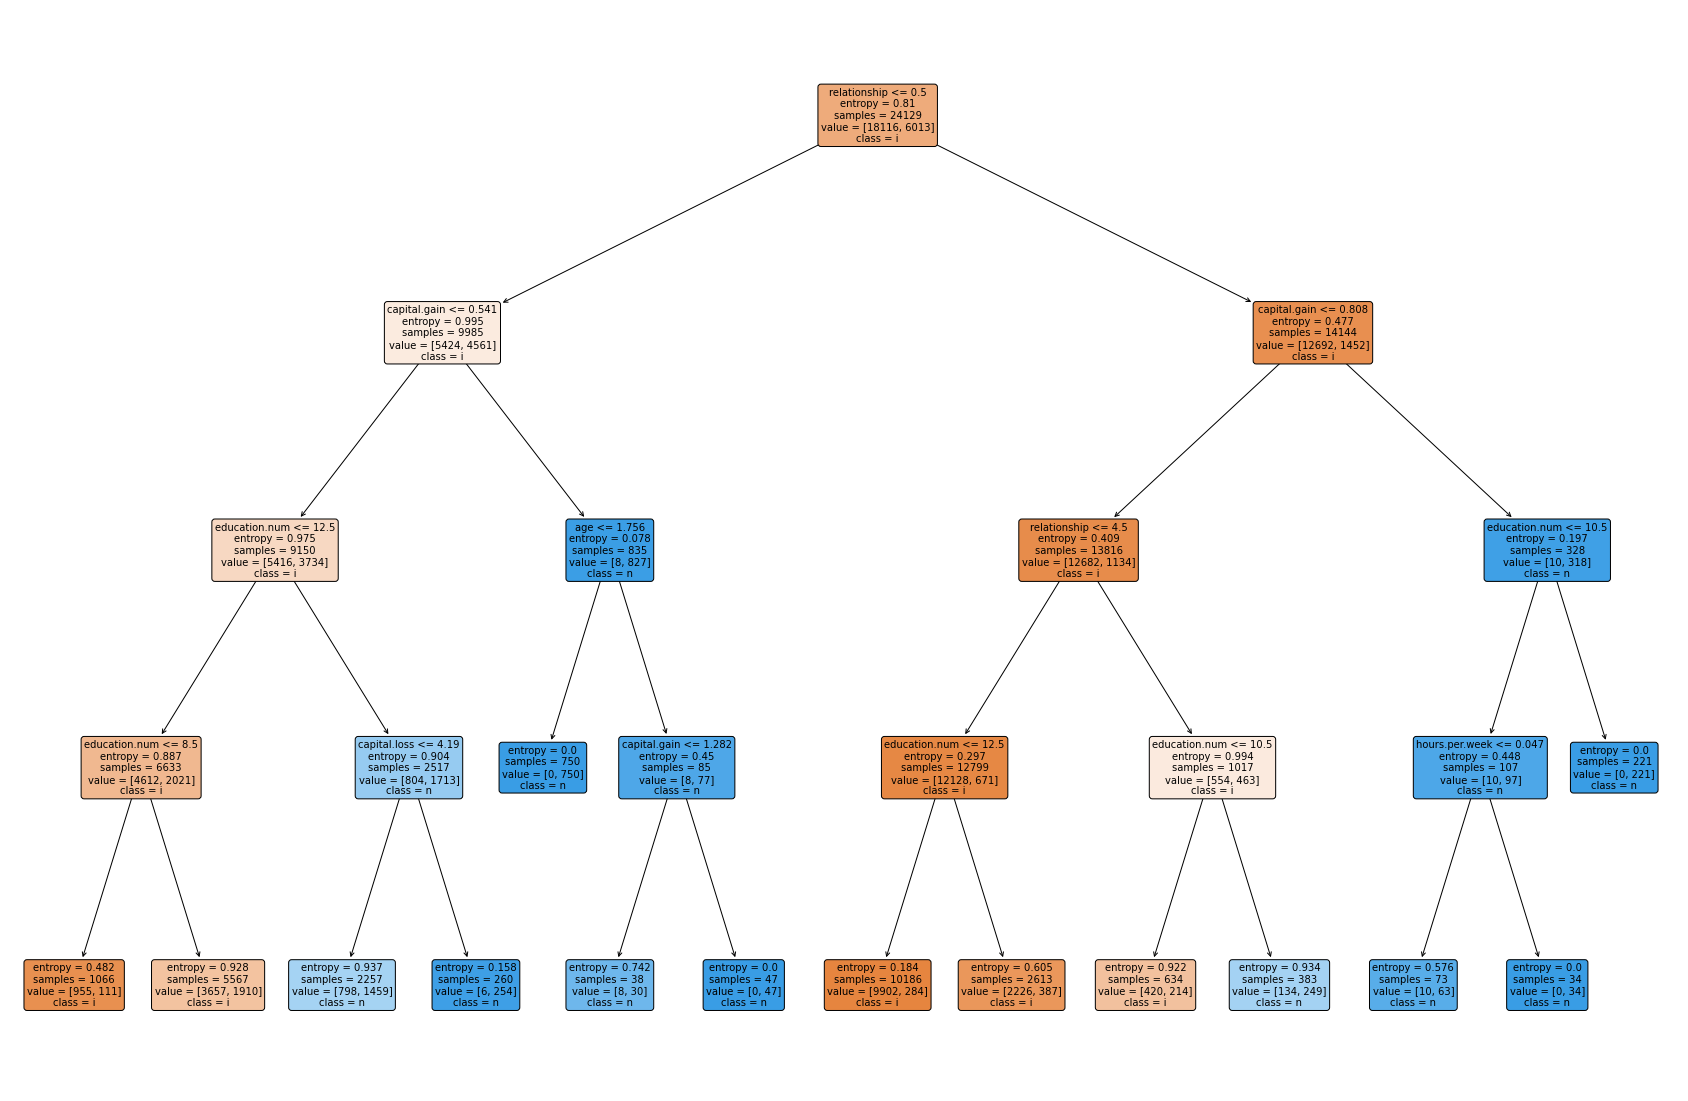

In [46]:
plt.figure(figsize=(30,20))
features = X.columns
dt = plot_tree(decision_tree=clf,feature_names = features,
               class_names = 'income', filled=True, rounded=True )